<a href="https://colab.research.google.com/github/sumitsaxena-git/ai-bootcamp/blob/main/Lecture_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture: Tokenising and Vectorising text
This is part of a ML course from *Invento Robotics*. We will cover the following:
1. Text Tokenising
2. Vectorising
3. TFIDF

In [ ]:
import nltk
text = "The Maurya Empire, founded by Chandragupta Maurya in 322 BC, was a significant political and military power in ancient India. Assisted by his advisor Chanakya, Chandragupta overthrew the Nanda Dynasty to establish the empire. The empire reached its peak under Ashoka the Great, known for its military strength and cultural advancements."

In [ ]:
nltk.download('punkt')
tokens = nltk.word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The', 'Maurya', 'Empire', ',', 'founded', 'by', 'Chandragupta', 'Maurya', 'in', '322', 'BC', ',', 'was', 'a', 'significant', 'political', 'and', 'military', 'power', 'in', 'ancient', 'India', '.', 'Assisted', 'by', 'his', 'advisor', 'Chanakya', ',', 'Chandragupta', 'overthrew', 'the', 'Nanda', 'Dynasty', 'to', 'establish', 'the', 'empire', '.', 'The', 'empire', 'reached', 'its', 'peak', 'under', 'Ashoka', 'the', 'Great', ',', 'known', 'for', 'its', 'military', 'strength', 'and', 'cultural', 'advancements', '.']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokens = [token for token in tokens if token not in stop_words]
print(tokens)

['The', 'Maurya', 'Empire', ',', 'founded', 'Chandragupta', 'Maurya', '322', 'BC', ',', 'significant', 'political', 'military', 'power', 'ancient', 'India', '.', 'Assisted', 'advisor', 'Chanakya', ',', 'Chandragupta', 'overthrew', 'Nanda', 'Dynasty', 'establish', 'empire', '.', 'The', 'empire', 'reached', 'peak', 'Ashoka', 'Great', ',', 'known', 'military', 'strength', 'cultural', 'advancements', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

pos_tags = pos_tag(tokens)
print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('The', 'DT'), ('Maurya', 'NNP'), ('Empire', 'NNP'), (',', ','), ('founded', 'VBD'), ('Chandragupta', 'NNP'), ('Maurya', 'NNP'), ('322', 'CD'), ('BC', 'NNP'), (',', ','), ('significant', 'JJ'), ('political', 'JJ'), ('military', 'JJ'), ('power', 'NN'), ('ancient', 'JJ'), ('India', 'NNP'), ('.', '.'), ('Assisted', 'NNP'), ('advisor', 'NN'), ('Chanakya', 'NNP'), (',', ','), ('Chandragupta', 'NNP'), ('overthrew', 'VBD'), ('Nanda', 'NNP'), ('Dynasty', 'NNP'), ('establish', 'VB'), ('empire', 'NN'), ('.', '.'), ('The', 'DT'), ('empire', 'NN'), ('reached', 'VBD'), ('peak', 'JJ'), ('Ashoka', 'NNP'), ('Great', 'NNP'), (',', ','), ('known', 'VBN'), ('military', 'JJ'), ('strength', 'NN'), ('cultural', 'JJ'), ('advancements', 'NNS'), ('.', '.')]


DT: Determiner (The, An, etc)

CD: Cardinal Number

VBD: Verb in past tense

NNP: Proper noun

JJ: Adjective

In [ ]:
from nltk import ne_chunk
nltk.download('words')
nltk.download('maxent_ne_chunker')

print(ne_chunk(pos_tags))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  The/DT
  (ORGANIZATION Maurya/NNP Empire/NNP)
  ,/,
  founded/VBD
  (PERSON Chandragupta/NNP Maurya/NNP)
  322/CD
  BC/NNP
  ,/,
  significant/JJ
  political/JJ
  military/JJ
  power/NN
  ancient/JJ
  (GPE India/NNP)
  ./.
  Assisted/NNP
  advisor/NN
  (PERSON Chanakya/NNP)
  ,/,
  (PERSON Chandragupta/NNP)
  overthrew/VBD
  (PERSON Nanda/NNP Dynasty/NNP)
  establish/VB
  empire/NN
  ./.
  The/DT
  empire/NN
  reached/VBD
  peak/JJ
  (PERSON Ashoka/NNP Great/NNP)
  ,/,
  known/VBN
  military/JJ
  strength/NN
  cultural/JJ
  advancements/NNS
  ./.)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
corpus = [' '.join(tokens)]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_df

,322,advancements,advisor,ancient,ashoka,assisted,bc,chanakya,chandragupta,cultural,...,military,nanda,overthrew,peak,political,power,reached,significant,strength,the
0,1,1,1,1,1,1,1,1,2,1,...,2,1,1,1,1,1,1,1,1,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,322,advancements,advisor,ancient,ashoka,assisted,bc,chanakya,chandragupta,cultural,...,military,nanda,overthrew,peak,political,power,reached,significant,strength,the
0,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.288675,0.144338,...,0.288675,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.144338,0.288675


In [ ]:
corpus = [
    'The Maurya Empire, founded by Chandragupta Maurya in 322 BC, was a significant political and military power in ancient India. Assisted by his advisor Chanakya, Chandragupta overthrew the Nanda Dynasty to establish his empire. The empire reached its peak under Ashoka the Great, known for his military strength and cultural advancement.',
    'Chandragupta Maurya, with the help of Chanakya, established the Maurya Empire by overthrowing the Nanda Dynasty. The empire became a significant political and military power in ancient India, reaching its zenith under the rule of Ashoka the Great.',
    'The Maurya Empire was a powerful political and military entity in ancient India. It was established by Chandragupta Maurya and his advisor Chanakya. The empire saw its greatest heights under Ashoka the Great.'
]
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,322,advancement,advisor,ancient,and,ashoka,assisted,bc,became,by,...,rule,saw,significant,strength,the,to,under,was,with,zenith
0,0.153286,0.153286,0.116578,0.090533,0.181067,0.090533,0.153286,0.153286,0.000000,0.181067,...,0.000000,0.000000,0.116578,0.153286,0.362134,0.153286,0.090533,0.116578,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.101626,0.101626,0.101626,0.000000,0.000000,0.172068,0.101626,...,0.172068,0.000000,0.130863,0.000000,0.609758,0.000000,0.101626,0.000000,0.172068,0.172068
2,0.000000,0.000000,0.163790,0.127198,0.254396,0.127198,0.000000,0.000000,0.000000,0.127198,...,0.000000,0.215365,0.000000,0.000000,0.381594,0.000000,0.127198,0.327581,0.000000,0.000000


## Word Embeddings

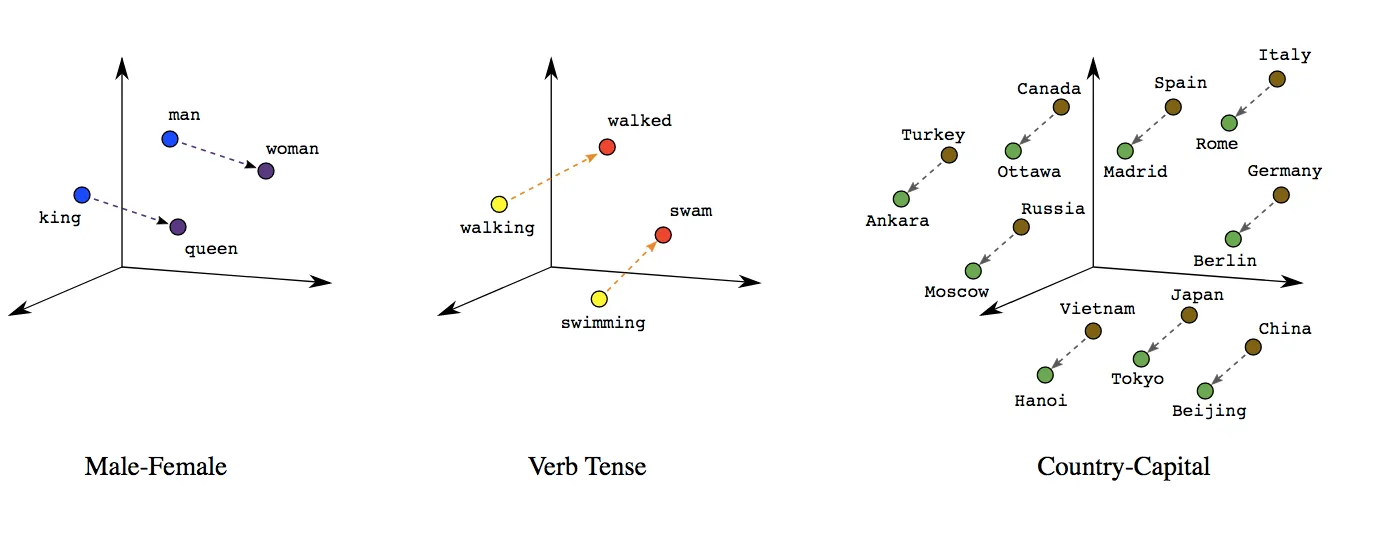

In [ ]:
import gensim.downloader as api

word2vec_model = api.load('glove-wiki-gigaword-50')  # This loads the Word2Vec model.

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
import numpy as np
def document_vector(model, words):
    words = [word for word in words if word in model.key_to_index]
    # If no words in the document are in the model's vocabulary, return a zero vector
    if not words:
        return np.zeros(model.vector_size)
    # Compute the average vector for the words in the document
    return np.mean(model[words], axis=0)

# Preprocess the corpus and compute the document vectors
corpus_preprocessed = [document.lower().split() for document in corpus]  # Simplistic tokenization
X = np.array([document_vector(word2vec_model, doc) for doc in corpus_preprocessed])
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.324364,0.065624,-0.148679,-0.073517,0.214915,-0.007057,-0.203797,-0.191424,-0.279485,-0.276623,...,-0.226591,0.058799,-0.062846,-0.013000,-0.399750,0.090532,-0.251068,-0.325610,-0.230956,-0.468172
1,0.377606,0.041059,-0.187702,-0.008989,0.196310,0.032190,-0.124744,-0.231399,-0.246546,-0.251365,...,-0.254613,0.001667,-0.040231,0.024673,-0.496841,0.207758,-0.241273,-0.316641,-0.242029,-0.648990
2,0.349850,0.044175,-0.251199,-0.075753,0.336465,0.021402,-0.224441,-0.190355,-0.332919,-0.294111,...,-0.154740,0.034125,-0.059330,0.011957,-0.464170,0.185120,-0.332855,-0.332755,-0.236192,-0.503810


In [ ]:
!pip install -U -q InstructorEmbedding sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
feature_extractor = pipeline("feature-extraction",framework="pt",model="sentence-transformers/all-mpnet-base-v2")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
feature_extractor("The Maurya Empire was a powerful political and military entity in ancient India. It was established by Chandragupta Maurya and his advisor Chanakya. The empire saw its greatest heights under Ashoka the Great.",return_tensors = "pt")[0].numpy().mean(axis=0)

array([ 3.60105261e-02,  7.54160732e-02,  2.05130056e-02, -1.50481090e-01,
       -3.19070630e-02,  6.61555082e-02,  4.54449691e-02, -9.89408419e-02,
       -2.40409235e-03, -1.07807830e-01,  1.49566606e-01, -1.93720520e-01,
       -3.59621570e-02,  4.56058234e-02,  1.49676353e-01,  4.22446914e-02,
       -1.98465362e-02,  3.62483636e-02, -1.08862460e-01,  1.11334808e-01,
       -4.76990826e-02, -4.16276865e-02, -1.01639787e-02,  1.17668241e-01,
       -1.01565897e-01, -6.93694502e-02,  1.19165003e-01, -8.34613740e-02,
       -2.04339653e-01, -1.15675896e-01,  1.31945163e-01, -8.66683051e-02,
       -2.04099100e-02, -8.31108168e-02,  4.96178654e-06,  1.10490313e-02,
       -1.28996652e-02, -1.02408655e-01,  1.18307188e-01, -5.50640374e-02,
        3.46295871e-02,  1.90386549e-02, -9.00439732e-03,  1.55871660e-02,
        2.05637757e-02,  3.49491858e-03,  3.69382128e-02, -4.46646363e-02,
        8.08526762e-03,  1.15657657e-01, -1.15659731e-02, -2.12457985e-01,
        1.21770613e-02, -

## 768 dimensions!

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stems = [stemmer.stem(token) for token in tokens]
print(stems)

['the', 'maurya', 'empir', ',', 'found', 'chandragupta', 'maurya', '322', 'bc', ',', 'signific', 'polit', 'militari', 'power', 'ancient', 'india', '.', 'assist', 'advisor', 'chanakya', ',', 'chandragupta', 'overthrew', 'nanda', 'dynasti', 'establish', 'empir', '.', 'the', 'empir', 'reach', 'peak', 'ashoka', 'great', ',', 'known', 'militari', 'strength', 'cultur', 'advanc', '.']


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['The', 'Maurya', 'Empire', ',', 'founded', 'Chandragupta', 'Maurya', '322', 'BC', ',', 'significant', 'political', 'military', 'power', 'ancient', 'India', '.', 'Assisted', 'advisor', 'Chanakya', ',', 'Chandragupta', 'overthrew', 'Nanda', 'Dynasty', 'establish', 'empire', '.', 'The', 'empire', 'reached', 'peak', 'Ashoka', 'Great', ',', 'known', 'military', 'strength', 'cultural', 'advancement', '.']


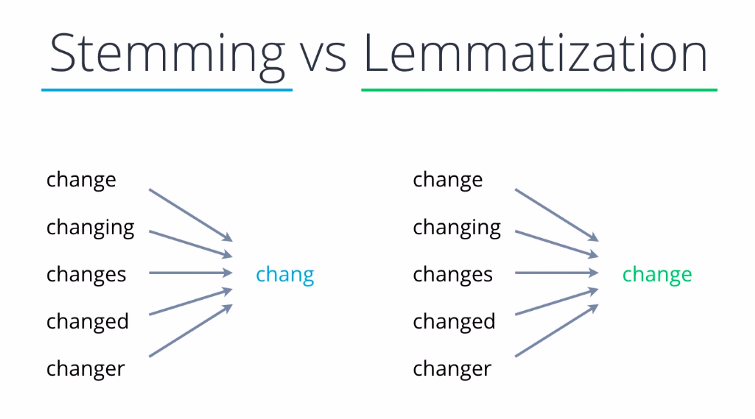

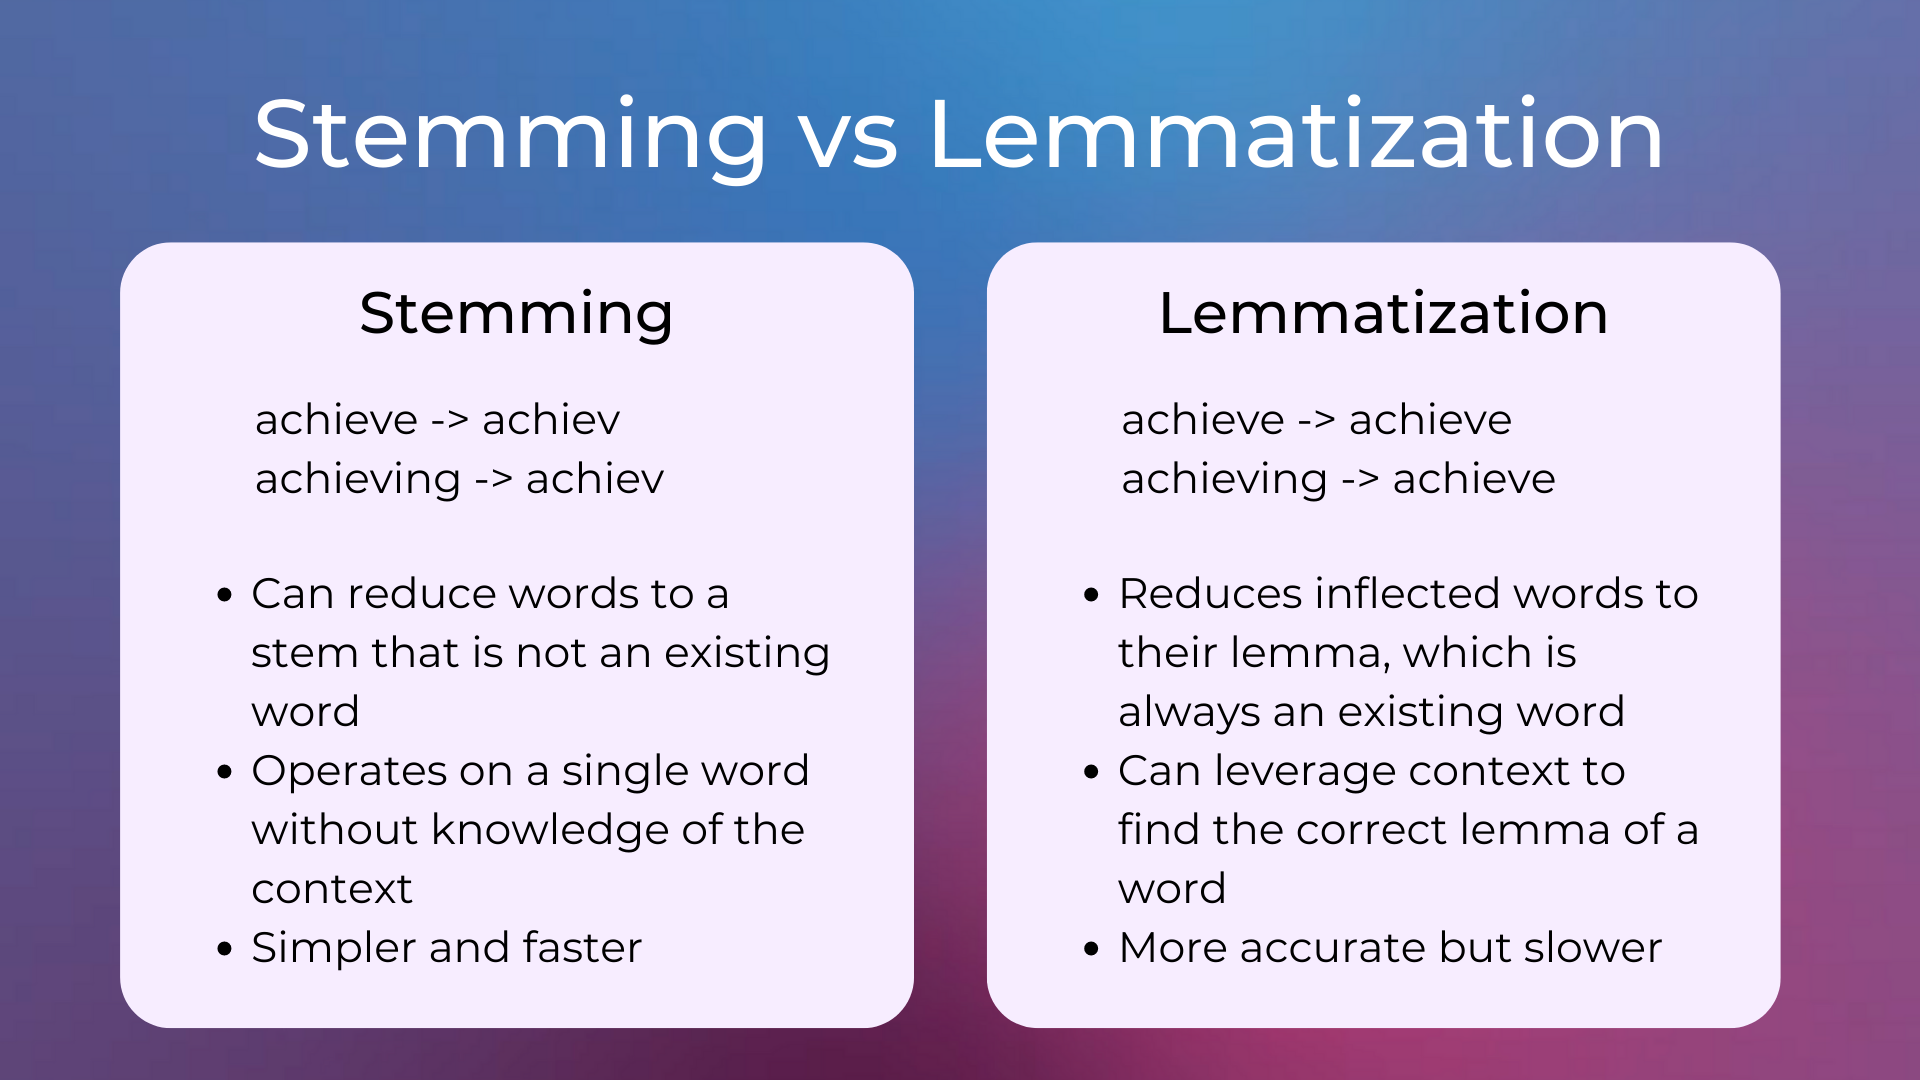

The WordNetLemmatizer doesn't always work, although for simpler words it does.

In [ ]:
lemmatizer.lemmatize("changes")

'change'

In [ ]:
stemmer.stem("changes")

'chang'

We will use the more powerful SpaCy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

for token in doc:
  print(token.text,":=>",token.lemma_)

The :=> the
Maurya :=> Maurya
Empire :=> Empire
, :=> ,
founded :=> found
by :=> by
Chandragupta :=> Chandragupta
Maurya :=> Maurya
in :=> in
322 :=> 322
BC :=> BC
, :=> ,
was :=> be
a :=> a
significant :=> significant
political :=> political
and :=> and
military :=> military
power :=> power
in :=> in
ancient :=> ancient
India :=> India
. :=> .
Assisted :=> assist
by :=> by
his :=> his
advisor :=> advisor
Chanakya :=> Chanakya
, :=> ,
Chandragupta :=> Chandragupta
overthrew :=> overthrow
the :=> the
Nanda :=> Nanda
Dynasty :=> Dynasty
to :=> to
establish :=> establish
the :=> the
empire :=> empire
. :=> .
The :=> the
empire :=> empire
reached :=> reach
its :=> its
peak :=> peak
under :=> under
Ashoka :=> Ashoka
the :=> the
Great :=> Great
, :=> ,
known :=> know
for :=> for
its :=> its
military :=> military
strength :=> strength
and :=> and
cultural :=> cultural
advancements :=> advancement
. :=> .


In [ ]:
doc[3].vector

array([ 0.11649832, -0.46253717, -0.34150618, -0.8342893 ,  0.26039052,
        3.5627177 , -1.4460332 ,  0.6760001 ,  1.0415696 ,  0.20786777,
       -0.6808521 , -1.0454892 ,  0.6673852 ,  0.06158867, -0.2080888 ,
       -1.215233  , -0.24174446, -0.24090028,  0.4637729 ,  0.3159842 ,
        0.67477167, -1.1369985 , -0.24863398, -0.24002945,  1.7190901 ,
        0.7730221 , -0.14294982, -0.33767688, -2.1201553 ,  0.01522575,
        1.2126518 , -0.38503093,  1.4752012 ,  0.66453874,  0.37255248,
       -1.1075352 , -1.1560717 , -0.4995761 , -0.04297993, -0.07403129,
       -0.65857446,  0.63057554, -0.744905  , -1.2928642 , -0.16909176,
       -0.03101067,  2.3569226 ,  0.20531073,  0.14689158,  0.9916541 ,
        0.10981891, -0.47884023,  0.48026723,  2.0635588 ,  1.8516756 ,
       -0.4629926 ,  0.12884739, -1.3495482 ,  0.3062646 , -1.1757097 ,
        1.8216351 , -0.57601845, -0.4421014 ,  0.69481254,  0.57389617,
       -0.04328871, -1.4454417 , -0.19494279,  0.14090979, -0.36